## Data Preparation

In [ ]:
incident_data.reset_index(inplace=True)

In [ ]:
y=incident_data['impact']
y

0         1
1         1
2         1
3         1
4         1
         ..
133031    1
133032    1
133033    1
133034    1
133035    1
Name: impact, Length: 133036, dtype: int64

In [ ]:
X=incident_data.drop(columns='impact')
X

,index,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,...,u_symptom,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
0,0,0,6,1,0,0,0,1,1398,198,...,494,1,2,46,72,1,0,0,12,50
1,1,0,7,1,0,0,2,1,1398,198,...,494,1,2,46,72,1,0,0,12,50
2,2,0,7,1,0,0,3,1,1398,198,...,494,1,2,46,72,1,0,0,12,50
3,3,0,5,0,0,0,4,1,1398,198,...,494,1,2,46,72,1,0,0,12,50
4,4,1,6,1,0,0,0,1,1398,119,...,347,1,2,62,222,1,0,0,12,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133031,141707,22591,5,0,1,0,4,1,158,9,...,363,1,2,23,0,0,1,0,16,203
133032,141708,22592,0,1,0,0,0,1,158,9,...,363,1,2,62,0,0,0,0,13,203
133033,141709,22592,0,1,1,0,1,1,158,9,...,363,1,2,23,72,0,0,0,13,203
133034,141710,22592,7,1,1,0,2,1,158,9,...,363,1,2,23,0,0,1,0,13,203


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((106428, 25), (26608, 25), (106428,), (26608,))

## Feature Engineering

### Feature selection using Chi-Square used only for the Categorical data


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=24)
ordered_feature=ordered_rank_feature.fit(X_train,y_train)
ordered_feature

SelectKBest(k=24, score_func=<function chi2 at 0x7f498c528cb0>)

In [ ]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')

,scores,0
0,1.544157e+07,index
1,2.387544e+06,number
9,4.046901e+04,opened_by
24,1.052681e+04,resolved_by
19,6.480809e+03,assigned_to
10,6.162191e+03,sys_updated_by
17,5.093378e+03,priority
16,3.425197e+03,urgency
8,2.334941e+03,caller_id
14,2.148252e+03,subcategory


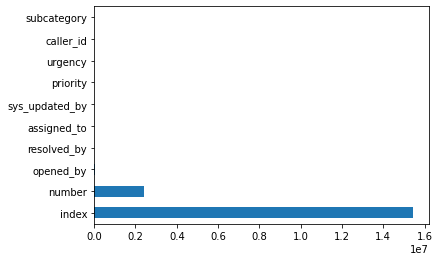

index             1.544157e+07
number            2.387544e+06
opened_by         4.046901e+04
resolved_by       1.052681e+04
assigned_to       6.480809e+03
sys_updated_by    6.162191e+03
priority          5.093378e+03
urgency           3.425197e+03
caller_id         2.334941e+03
subcategory       2.148252e+03
dtype: float64

In [ ]:
ranked_features=pd.Series(ordered_feature.scores_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

# Feature selection using ExtraTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([8.04858711e-03, 8.04816681e-03, 2.04091606e-03, 4.27874136e-04,
       3.48116698e-03, 5.75427917e-04, 2.89830762e-03, 6.43245337e-04,
       6.10209267e-03, 1.37442947e-02, 2.28333156e-03, 1.72897259e-04,
       6.91777461e-03, 6.46814740e-03, 6.13999158e-03, 4.73617100e-03,
       2.93658628e-01, 6.05869995e-01, 4.66581600e-03, 5.01404654e-03,
       3.56640861e-03, 3.05760381e-03, 5.03470889e-08, 4.57084509e-03,
       6.86821331e-03])

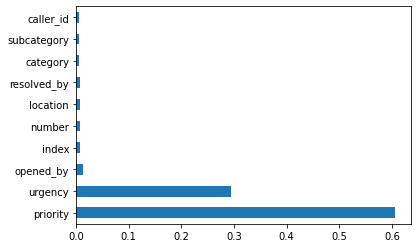

priority       0.605870
urgency        0.293659
opened_by      0.013744
index          0.008049
number         0.008048
location       0.006918
resolved_by    0.006868
category       0.006468
subcategory    0.006140
caller_id      0.006102
dtype: float64

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

# Feature selection using DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_class = DecisionTreeClassifier()
DT_class.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT_class.feature_importances_

array([1.58965560e-03, 3.89514105e-03, 0.00000000e+00, 0.00000000e+00,
       1.86499657e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.07432790e-05, 1.69930198e-04, 0.00000000e+00, 0.00000000e+00,
       1.24153761e-03, 0.00000000e+00, 4.44609343e-03, 1.01854150e-03,
       1.05777770e-01, 8.79444411e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.69994653e-04,
       1.51184962e-04])

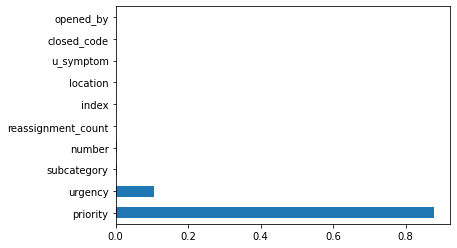

priority              0.879444
urgency               0.105778
subcategory           0.004446
number                0.003895
reassignment_count    0.001865
index                 0.001590
location              0.001242
u_symptom             0.001019
closed_code           0.000370
opened_by             0.000170
dtype: float64

In [ ]:
ranked_features=pd.Series(DT_class.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

# Feature Selection using Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.18870183, 0.1952432 , 0.00540055, 0.01643196, 0.00144955,
       0.0004577 , 0.00263106, 0.02060169, 0.10893495, 0.07015353,
       0.03208678, 0.02318665, 0.01492195, 0.02080647, 0.02912986,
       0.03385093, 0.17164006, 0.24627854, 0.02770288, 0.04149148,
       0.00404098, 0.00229828, 0.00046762, 0.01252118, 0.0472584 ])

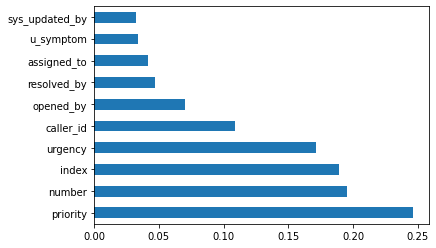

priority          0.246279
number            0.195243
index             0.188702
urgency           0.171640
caller_id         0.108935
opened_by         0.070154
resolved_by       0.047258
assigned_to       0.041491
u_symptom         0.033851
sys_updated_by    0.032087
dtype: float64

In [ ]:
ranked_features=pd.Series(mutual_info,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

## Selected the important Features which are obtained from the Feature Selection Process.(Select the Features having more impact on dependent variable.)

In [ ]:
X=incident_data[['priority','urgency','index','number','opened_by','resolved_by','assigned_to','category','knowledge','location','u_priority_confirmation','reassignment_count']]
X

,priority,urgency,index,number,opened_by,resolved_by,assigned_to,category,knowledge,location,u_priority_confirmation,reassignment_count
0,2,1,0,0,198,50,72,45,1,41,0,0
1,2,1,1,0,198,50,72,45,1,41,0,0
2,2,1,2,0,198,50,72,45,1,41,0,0
3,2,1,3,0,198,50,72,45,1,41,0,0
4,2,1,4,1,119,194,222,29,1,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
133031,2,1,141707,22591,9,203,0,31,0,101,1,1
133032,2,1,141708,22592,9,203,0,31,0,101,0,0
133033,2,1,141709,22592,9,203,72,31,0,101,0,1
133034,2,1,141710,22592,9,203,0,31,0,101,1,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133036 entries, 0 to 133035
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   priority                 133036 non-null  int64
 1   urgency                  133036 non-null  int64
 2   index                    133036 non-null  int64
 3   number                   133036 non-null  int64
 4   opened_by                133036 non-null  int64
 5   resolved_by              133036 non-null  int64
 6   assigned_to              133036 non-null  int64
 7   category                 133036 non-null  int64
 8   knowledge                133036 non-null  int64
 9   location                 133036 non-null  int64
 10  u_priority_confirmation  133036 non-null  int64
 11  reassignment_count       133036 non-null  int64
dtypes: int64(12)
memory usage: 12.2 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106428, 12), (26608, 12), (106428,), (26608,))